# Measuring the height, width and frequency of a peak

We first generate a dummy signal to play with:

[ Info: Precompiling Spectra [391af1a9-06f1-59d3-8d21-0be089654739] (cache misses: include_dependency fsize change (2), wrong dep version loaded (4), mismatched flags (12))


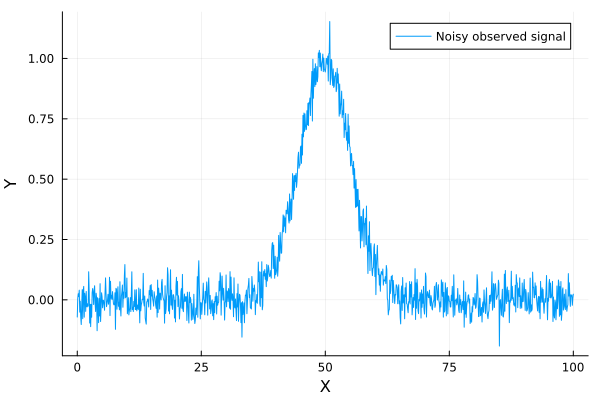

In [1]:
using Plots, Spectra, Random

# the x axis
x = collect(0:0.1:100)

# a fake signal: perfect y
y_perfect = gaussian(x, 1.0, 50.0, 6.0)

# we add noise: observed y
y = y_perfect + 0.05*randn(size(x,1))

plot(x, y, label="Noisy observed signal", xlabel="X", ylabel="Y")

Estimates are done with the peakmeas function on a smoothed signal for a single peak.

In [2]:
height_y, hwhm_y, position_y, centroid_y, smoothed_y = peakmeas(x,vec(y),smoothing = "yes", method= "savgol",  y_smo_out = true)

println("Estimated peak height is $(height_y)")
println("Estimated peak hwhm is $(hwhm_y)")
println("Estimated peak position is $(position_y)")
println("Estimated peak centroid is $(centroid_y)")


Estimated peak height is 1.008895032200939
Estimated peak hwhm is 50.6
Estimated peak position is 5.799999999999997
Estimated peak centroid is 50.19998397844617


But this does not work on multiple peaks. We introduced a new function, `find_peaks` to do a better job:

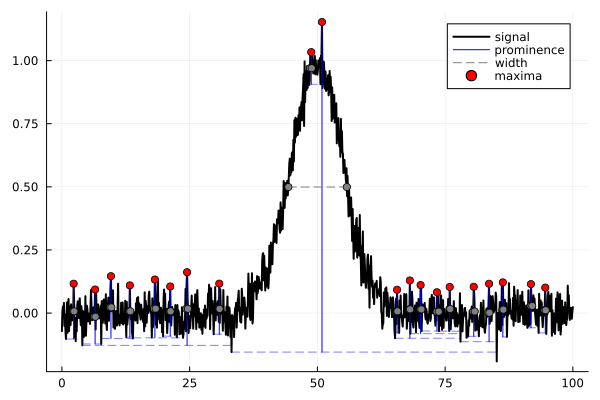

Peak positions: [2.3, 6.5, 9.6, 13.3, 18.2, 21.2, 24.5, 30.8, 48.8, 50.9, 65.6, 68.1, 70.2, 73.4, 75.9, 80.6, 83.6, 86.3, 91.8, 94.6]
Peak heights: [0.11633292275776111, 0.0933781725448, 0.14610855888563334, 0.10966459287764246, 0.1329514394138751, 0.10538822902223813, 0.16192583731363683, 0.11672662836056465, 1.0335295739942822, 1.152912526269398, 0.09246686406998728, 0.12914700014644048, 0.11104552162268744, 0.08257701554629278, 0.10359797934001513, 0.10428018659937546, 0.11622284468779477, 0.12165693773599796, 0.11477262465736911, 0.10085013069197851]
Peak hwhms: [0.09999999999999987, 0.1499999999999999, 0.14999999999999947, 0.10000000000000053, 0.1999999999999993, 0.09999999999999964, 0.1999999999999993, 0.09999999999999964, 0.1999999999999993, 5.75, 0.10000000000000142, 0.10000000000000142, 0.10000000000000142, 0.20000000000000284, 0.10000000000000142, 0.14999999999999858, 0.14999999999999858, 0.10000000000000142, 0.19999999999999574, 0.14999999999999858]
Peak centroids: [2.3, 6.4

In [3]:
result = find_peaks(x, y, smoothing=false, method="gcvspline", window_size = 20)
display(result.plot_peaks)
println("Peak positions: ", result.peak_positions)
println("Peak heights: ", result.peak_heights)
println("Peak hwhms: ", result.peak_hwhms)
println("Peak centroids: ", result.peak_centroids)

Hum... we have multiple peaks? We need to tweak the parameters of the `find_peaks` function. We can increase the `min_height` value to detect only peaks above a certain threshold. Other options are possible, see the documentation of `find_peaks`.

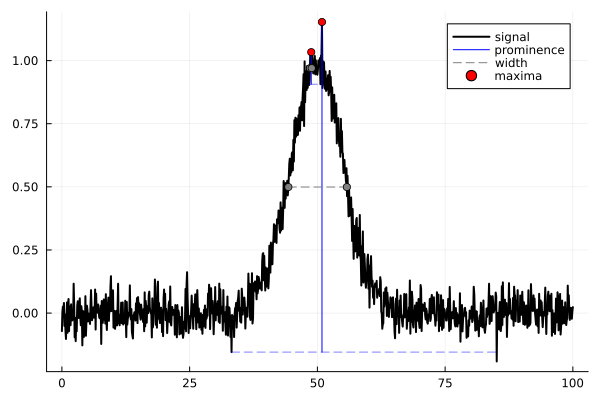

Peak positions: [48.8, 50.9]
Peak heights: [1.0335295739942822, 1.152912526269398]
Peak hwhms: [0.1999999999999993, 5.75]
Peak centroids: [48.700351930332445, 50.035207231983]


In [4]:
result = find_peaks(x, y, smoothing=false, method="gcvspline", window_size = 20, min_height=0.2)
display(result.plot_peaks)
println("Peak positions: ", result.peak_positions)
println("Peak heights: ", result.peak_heights)
println("Peak hwhms: ", result.peak_hwhms)
println("Peak centroids: ", result.peak_centroids)

Good! It works now better. The centroid can also be measured using directly the `centroid` function. It accepts x-y inputs, list of x-y spectra, or arrays of ys spectra associated to a vector of x values, see the documentation of `centroid()`.

In [5]:
centroid2 = centroid(x,y)
println("Estimated peak centroid is $(centroid2)")


Estimated peak centroid is 50.22937706600698
